In [53]:
#import data to pandas dataframe
import pandas as pd
delivery_time_df = pd.read_csv("delivery_time.csv")
delivery_time_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [54]:
from scipy import stats
import numpy as np

In [55]:
delivery_time_df.info()
#info() method to check data types of variables and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [56]:
delivery_time_df.corr()
#correlation is to check variable dependency anges from -1(negative corr) to +1(positive corr) zero (No corr). Pearson corr is mostly used, but it cannot 
#tell the difference between dependent variables and independent variables
#0.7+ very strong corr, 0.4 to 0.69 strong corr, +.30 to +.39 Moderate positive relationship in both postive and negative side

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

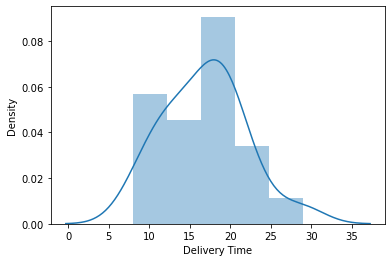

In [57]:
#Above output shows very strong correlation between 2 variables
#depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.
import seaborn as sns
sns.distplot(delivery_time_df['Delivery Time'])

<AxesSubplot:>

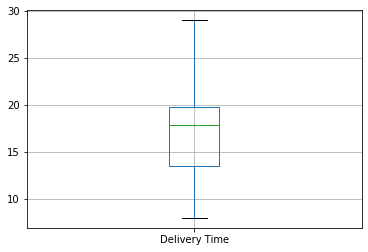

In [58]:
delivery_time_df.boxplot(column='Delivery Time')

In [59]:
import numpy as np

In [61]:
#Applying LOG transformation on RIGHT skew data
Log_delivery_time_df = delivery_time_df
Log_delivery_time_df['Delivery Time'] = np.log(Log_delivery_time_df['Delivery Time'])
Log_delivery_time_df

,Delivery Time,Sorting Time
0,3.044522,10
1,2.602690,4
2,2.983153,6
3,3.178054,9
4,3.367296,10
5,2.731115,6
6,2.944439,7
7,2.251292,3
8,2.884801,10
9,2.931194,9


<AxesSubplot:>

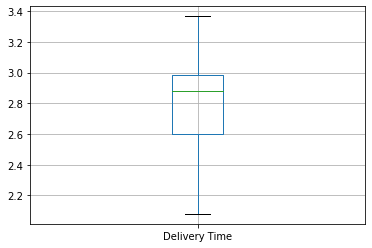

In [62]:
Log_delivery_time_df.boxplot(column='Delivery Time')

In [63]:
#After applying LOG on Right skewed data, Transformation turned it to LEft skew. So will apply square transformation on LOG transformation
LogNsqu_delivery_time_df = Log_delivery_time_df
LogNsqu_delivery_time_df['Delivery Time'] = LogNsqu_delivery_time_df['Delivery Time']**2
LogNsqu_delivery_time_df

,Delivery Time,Sorting Time
0,9.269117,10
1,6.773994,4
2,8.899205,6
3,10.100026,9
4,11.338681,10
5,7.458992,6
6,8.669721,7
7,5.068315,3
8,8.322075,10
9,8.591897,9


<AxesSubplot:>

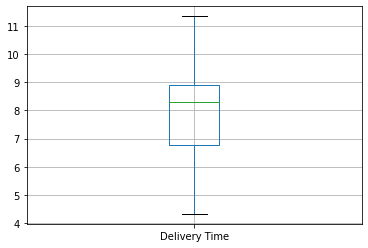

In [64]:
LogNsqu_delivery_time_df.boxplot(column='Delivery Time')

In [ ]:
#Delivery Time seems to be norma.Check sorting time normality

<AxesSubplot:>

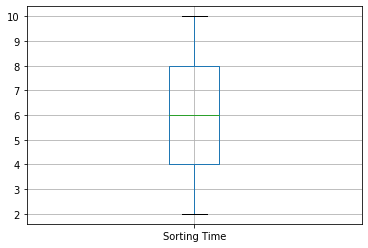

In [34]:
delivery_time_df.boxplot(column='Sorting Time', grid=True)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

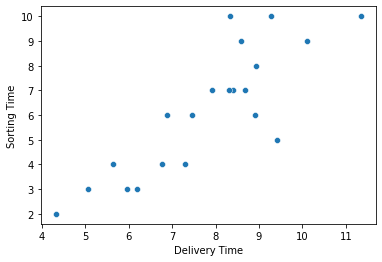

In [65]:
#sactter plot used to evaluate relation between two quantitative variables
sns.scatterplot(data=LogNsqu_delivery_time_df, x="Delivery Time", y="Sorting Time")

In [66]:
#Above scatter plot shows it is positively correlated 
LogNsqu_delivery_time_df.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, inplace=True)

In [67]:
#OLS ordinary least squares used to find the best fit line with less errors
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = LogNsqu_delivery_time_df).fit()
model
#OLS = Ordinary least squares method used to find the best fit line

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

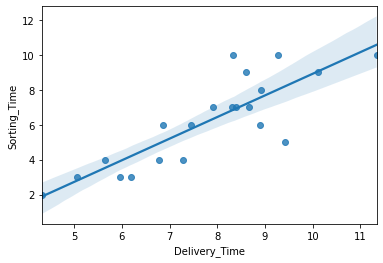

In [68]:
#Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=LogNsqu_delivery_time_df)

In [69]:
#Coefficients
model.params

Intercept       4.253335
Sorting_Time    0.572257
dtype: float64

In [70]:
#T-value : t-statistic measures how many standard errors the coefficient is away from zero. Generally, any t-value greater than +2 or less than – 2 is acceptable. The higher the t-value, the greater the confidence we have in the coefficient as a predictor. Low t-values are indications of low reliability of the predictive power of that coefficient.
#P-value : The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. a p value of 0.0254 is 2.54%. This means there is a 2.54% chance your results could be random. Therefore, the smaller the p-value, the more important (“significant“) your results.let’s say you chose an alpha level of 5% (0.05) A small p (≤ 0.05), reject the null hypothesis, A large p (> 0.05) means the alternate hypothesis is weak,
print(model.tvalues, '\n', model.pvalues)  

Intercept       7.563779
Sorting_Time    6.786790
dtype: float64 
 Intercept       3.814931e-07
Sorting_Time    1.759163e-06
dtype: float64


In [71]:
#Above p-value 0.000004 is significant & t-value is 3.82 which is acceptable
#Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. 
#R squared value : R2 assumes that every single variable explains the variation in the dependent variable. 
#Adjusted R squared value : adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
#	Adjusted R2 will always be less than or equal to R2.
(model.rsquared,model.rsquared_adj)

(0.7079641982822116, 0.6925938929286437)

In [72]:
model_orig = smf.ols("Delivery_Time~Sorting_Time",data = LogNsqu_delivery_time_df).fit()


In [73]:
#Below (model.rsquared,model.rsquared_adj) is generated for data that has no transformations seems i get good result for data without transformation only so i will use for w/o transformation
(model_orig.rsquared,model_orig.rsquared_adj)

(0.7079641982822116, 0.6925938929286437)

In [74]:
#Adj R square & R square are nearly equal (No much diff) good model
#Predict for 15 & 16
newdata=pd.Series([15,16])

In [75]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])


In [76]:
data_pred

,Sorting_Time
0,15
1,16


In [77]:
model_orig.predict(data_pred)

0    12.837197
1    13.409454
dtype: float64

In [78]:
orginal_delivery_time_df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [79]:
#Predict for known values
knowndata=pd.Series([10,4])
known_data_pred=pd.DataFrame(knowndata,columns=['Sorting_Time'])
known_data_pred

,Sorting_Time
0,10
1,4


In [80]:
model_orig.predict(known_data_pred)

0    9.975910
1    6.542365
dtype: float64

In [81]:
#Predicting sorting_time using Delivery_time
other_model = smf.ols("Sorting_Time~Delivery_Time",data = LogNsqu_delivery_time_df).fit()
other_model

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

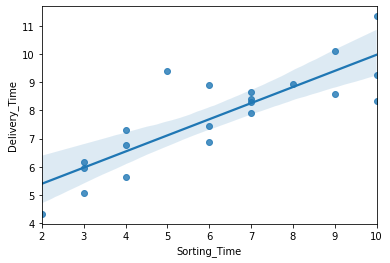

In [82]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=LogNsqu_delivery_time_df)

In [83]:
other_model.params

Intercept       -3.454143
Delivery_Time    1.237143
dtype: float64

In [84]:
#t and p-Values
print(other_model.tvalues, '\n', other_model.pvalues)

Intercept       -2.375634
Delivery_Time    6.786790
dtype: float64 
 Intercept        0.028196
Delivery_Time    0.000002
dtype: float64


In [85]:
#R squared values
(other_model.rsquared,other_model.rsquared_adj)

(0.7079641982822116, 0.6925938929286437)

In [86]:
#Predict for 29 and 30
other_newdata=pd.Series([35,40])
other_data_pred=pd.DataFrame(other_newdata,columns=['Delivery_Time'])
other_data_pred

,Delivery_Time
0,35
1,40


In [87]:
other_model.predict(other_data_pred)

0    39.845857
1    46.031571
dtype: float64